In [2]:
from __future__ import division
import sys
sys.path.append('../validation_viewer/')

%matplotlib inline
from pylab import *
import os
import glob
from pandas import *
from pandas import datetime
import re
import pyresample as pr
from ipywidgets import interactive
import itertools
import plots_daily as pd
import plots_aggregated as pa
reload(pa)

ImportError: No module named plots_daily

### The working directory

### Download the data and save it to the folder 'data'

In [ ]:
%%bash
cd /data2/validation/amsr2
wget ftp://ftp.dmi.dk/sat/amsr2_validation/amsr2_val_2015.tar.gz
mkdir /data2/validation/amsr2/data
tar -xvf amsr2_val_2015.tar.gz -C /home/jol/Documents/Data/amsr2/validation/

In [ ]:
%%bash
wget ftp://ftp.dmi.dk/sat/ssmis_emiss/emiss_val_2015.tar.gz
mkdir data
tar -xvf emiss_val_2015.tar.gz -C data

Wait for the above code to download the validation data and extract to the 'data' folder in the working directory.

### Set some global variables

In [20]:
from config.config_amsr2 import *

In [ ]:
from config_ssmi import *

In [ ]:
from config_emissivity import *

In [ ]:
os.path.join(path_to_data, path)

In [51]:
RESULTS_PATHS

{'amsr2_validation_NH_2016-05-17_results.csv': ('OSI Algorithm',
  'Northern Hemisphere'),
 'amsr2_validation_NH_tud_2016-05-17_results.csv': ('TUD Algorithm',
  'Northern Hemisphere'),
 'amsr2_validation_SH_2016-05-17_results.csv': ('OSI Algorithm',
  'Southern Hemisphere'),
 'amsr2_validation_SH_tud_2016-05-17_results.csv': ('TUD Algorithm',
  'Southern Hemisphere')}

## Plots of Daily Summary Statistics

In [1]:
pl = pa.line_plots()

NameError: name 'pa' is not defined

In [58]:
pl.to_excel('/home/jol/Documents/Programs/data_analaysis/validation/bias_std_amsr2.xls')

df1 = {}
print pl.keys()
df1['OSIAlgorithm_NH'] = pl.OSIAlgorithm_NH.loc['mean']
df1['OSIAlgorithm_SH'] = pl.OSIAlgorithm_SH.loc['mean']
DataFrame(df1).to_excel('/home/jol/Documents/Programs/data_analaysis/validation/bias_std_mean_ssmi.xls')

# pldf.ix[8:16].to_excel('/home/jol/Documents/Programs/data_analaysis/validation/means_std1.xls')

df = DataFrame(means)
df.to_csv('/home/jol/Documents/Programs/data_analaysis/validation/means.csv')

Index([u'OSIAlgorithm_NH', u'OSIAlgorithm_SH', u'TUDAlgorithm_NH',
       u'TUDAlgorithm_SH'],
      dtype='object')


       within_10pct  within_20pct
count     56.000000     56.000000
mean      91.626393     94.309911
std        3.231741      2.240626
min       82.160094     87.813251
25%       91.262262     93.870089
50%       92.664728     95.012974
75%       93.752524     95.776665
max       95.621050     96.999253


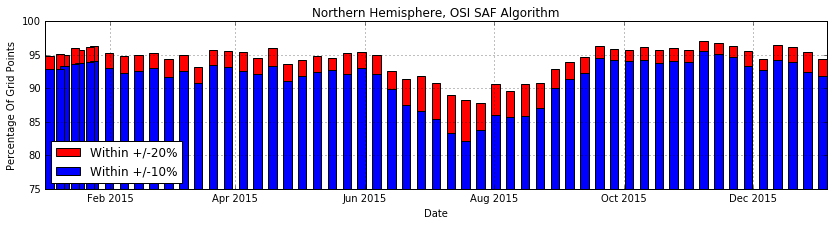

       within_10pct  within_20pct
count     52.000000     52.000000
mean      89.447837     93.938525
std        3.888338      2.657355
min       78.905387     88.083261
25%       87.652410     93.364840
50%       90.393594     94.754780
75%       92.116119     95.521818
max       94.798726     96.998494


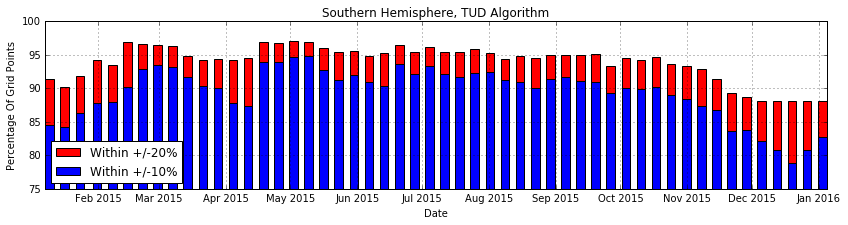

       within_10pct  within_20pct
count     52.000000     52.000000
mean      89.581677     93.928066
std        4.237439      2.888892
min       78.581618     87.483509
25%       87.689698     92.916016
50%       90.859421     94.755484
75%       92.698942     95.989616
max       94.774007     97.190650


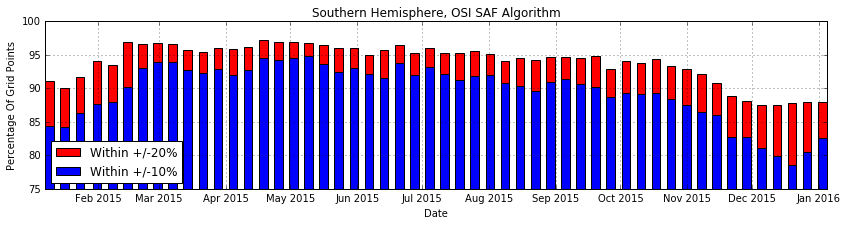

       within_10pct  within_20pct
count     56.000000     56.000000
mean      92.033914     94.527584
std        3.323740      2.265714
min       82.080330     88.053048
25%       91.541467     93.728797
50%       93.307150     95.329002
75%       94.221896     96.084742
max       95.984027     97.116880


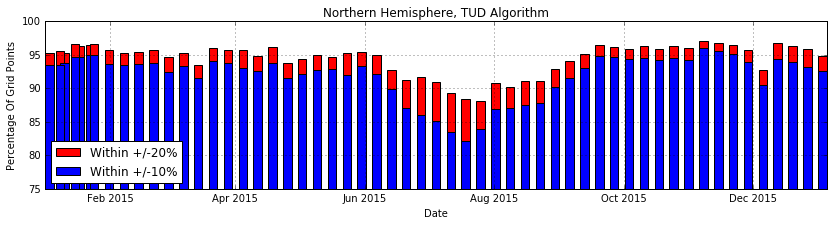

In [45]:
pa.barcharts()

## A Closer Look Into The Data

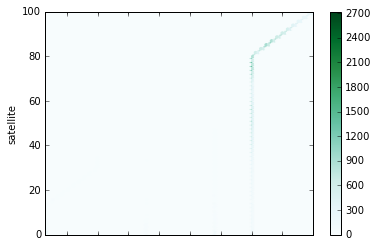

In [16]:
reload(plots)
FILE_PATH = '/data/jol/osisaf/ssmi/OSI-450/validation/OSI401_validation_2015/OSI401_val_data.hdf5'
vplots = plots.ValidationPlots(FILE_PATH)

def interact_out(dateidx, plot_type, hemisphere):
    vplots.hemisphere = hemisphere
    return getattr(vplots, plot_type)(dateidx)

matplotlib.rcParams.update({'font.size': 10})
plot_types = ['plot_map_with_anolomoly', 'plot_hemisphere', 'plot_kde', 'scatter', 'hex_bin', 'histogram']
hemispheres = ['NH', 'SH']
interactive(interact_out, dateidx=(0, len(vplots.dates)-1, 1), plot_type=plot_types, hemisphere=hemispheres)

## Further Anaylsis For A Specific Day

In [ ]:
dateidx = 32
#Hemisphere = 'Northern'
fig = interact_out(dateidx, 'Histograms')
#fig.savefig('{0}{1}_{2}{3}'.format(path_to_plots, 'SH', dates[dateidx], '.png'))
#df.describe()

In [ ]:
arange(len(dates))[dates == '2015-07-02']

In [ ]:
linspace(0, 100, 6)

In [ ]:
pt = interact_out(0, 'PivotTable')

In [ ]:
type(pt)

In [ ]:
pt.to_csv('/home/jol/Documents/temp/ice_summary.csv')

## Save the Emissivity Images

In [59]:
for i, date in enumerate(dates):
    try:
        fig = interact_out(i, 'figure')
        p_paths = os.path.join(path_to_plots,'{0}_{1}{2}{3}'.format(Hemisphere, date, SUFFIX,'.png'))
        print(p_paths)
        fig.savefig(p_paths, dpi=200, bbox_inches='tight')
    except AttributeError:
        print "ERROR"
        pass

NameError: name 'dates' is not defined

In [23]:
path_to_plots

'/data/jol/osisaf/amsr2/plots/'

## Make a GIF from the Images

In [ ]:
%%bash
cd /home/jol/Documents/Programs/data_analaysis/validation/plots
convert -loop 0 NH*2015-01*.png NH_emissivity.gif
convert -loop 0 SH*2015-01*.png SH_emissivity.gif

## Create Some Statistics

In [ ]:
hm_dic = {'Northern':'NH' , 'Southern':'SH'}
stats_dict = {}
for hemisphere in ['Northern', 'Southern']:
    stats = []
    for date in dates[0:]:
        try:
            df = interact_out(hemisphere, date, 'Dataframe')
            df = df.dropna()
            stats.append((datetime.strptime(date, '%Y-%m-%d'),
                          df['satellite'].mean(),
                          df['reference'].mean(),
                          ))
        except AttributeError:
            pass
    stats_dict[hm_dic[hemisphere]] = array(stats)

In [ ]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(18, 12))
def plot_err(hem):   
    x = stats_dict[hem][:,0]
    y = stats_dict[hem][:,1]
    yerr = stats_dict[hem][:,2]
    ax.errorbar(x, y, yerr=yerr, fmt='o',alpha=0.5)
    plttitle = {'NH': 'Northern' , 'SH':'Southern'}
    title('Mean Difference Between The Product & Reference Emissivity\nwith Std.'
          ' in the Northern (Blue) & Southern (Green) Hemispheres')
    #title('Mean Difference Between The Product & Reference Emissivity with Std.\n'
    #      'In The '+plttitle[hem]+ ' Hemisphere')
    fig.autofmt_xdate()
    ylabel('Emissivity')
plot_err('NH')
#show()
plot_err('SH')
savefig('{0}{1}_{2}{3}'.format(path_to_plots, 'mean', date, '.png'))
#show()

In [ ]:
matplotlib.rcParams.update({'font.size': 10})
def plot2(hem):   
    fig, ax = plt.subplots()
    date = stats_dict[hem][:,0]
    sat = stats_dict[hem][:,1]
    ref = stats_dict[hem][:,2]
    
    ax.plot(date, sat,'.-')
    ax.plot(date, ref,'.-')
    plttitle = {'NH': 'Northern' , 'SH':'Southern'}
    title('The Mean Emissivity of the Product & Reference'
          '\nin the %s Hemisphere' % plttitle[hem])
    #title('Mean Difference Between The Product & Reference Emissivity with Std.\n'
    #      'In The '+plttitle[hem]+ ' Hemisphere')
    fig.autofmt_xdate()
    ylabel('Emissivity')
plot2('NH')
legend(['Product','Reference'],loc=3)
grid()
savefig('{0}{1}_{2}{3}'.format(path_to_plots, 'mean_NH', date, '.png'),dpi=120)
plot2('SH')
legend(['Product','Reference'],loc=8)
grid()
savefig('{0}{1}_{2}{3}'.format(path_to_plots, 'mean_SH', date, '.png'),dpi=120)

In [ ]:
import itertools
for A, B, C in itertools.product(['a', 'b', 'c'], ['d', 'e','f'], ['i','j','k']):
    print A, B, C